In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [37]:
df = pd.read_csv('dressler.csv')

In [38]:
df = pd.DataFrame(df)

In [61]:
df['MType']

0       
1       
2       
3       
4       
      ..
672     
673     
674     
675     
676     
Name: MType, Length: 677, dtype: object

In [40]:
#Separo en cluster y cluster
campo = np.where(df['Mm'] == 'f')[0]
field = df.iloc[campo]

cumulo = np.where(df['Mm'] == 'c')[0]
cluster = df.iloc[cumulo]


In [41]:
#Selecciono galaxias que solo tengan tipo morfologico disponible
f_morphology = np.where(field['MType'] != ' ')[0]
field = field.iloc[f_morphology]

f2_morphology = np.where(cluster['MType'] != ' ')[0]
cluster = cluster.iloc[f2_morphology]

In [42]:
#Selecciono galaxias con valores validos para Hdelta y OII
f_values= np.where((field['Hdelta'] != 0))[0]
field = field.iloc[f_values]

f2_values = np.where((cluster['Hdelta'] != 0))[0]
cluster = cluster.iloc[f2_values]

In [66]:
#Tipos morfologicos de Balogh FIELD
f_morphES0 = np.where((field['MType'] == 'E/S0') | (field['MType'] == 'E') | (field['MType'] == 'S0'))
field_ES0 = field.iloc[f_morphES0]

f_morphSab = np.where((field['MType'] == 'Sab'))
field_Sab = field.iloc[f_morphSab]

f_morphSbcd = np.where((np.where(field['MType'] == 'Sbcd')) | (field['MType'] == 'Sb') | (field['MType'] == 'Sc') | (field['MType'] == 'Sd'))
field_Sbcd = field.iloc[f_morphSbcd]

field_Irr = field[field['MType'].str.contains('Irr', na=False)]
field_IrrSB = field[field['MType'].str.contains('SB', na=False)]


/tmp/ipykernel_15648/1138696386.py:8: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  f_morphSbcd = np.where((np.where(field['MType'] == 'Sbcd')) | (field['MType'] == 'Sb') | (field['MType'] == 'Sc') | (field['MType'] == 'Sd'))


In [67]:
#Tipos morfologicos de Balogh FIELD
f_morphES0 = np.where((cluster['MType'] == 'E/S0') | (cluster['MType'] == 'E') | (cluster['MType'] == 'S0'))
cluster_ES0 = cluster.iloc[f_morphES0]

f_morphSab = np.where((cluster['MType'] == 'Sab'))
cluster_Sab = cluster.iloc[f_morphSab]

f_morphSbcd = np.where((np.where(cluster['MType'] == 'Sbcd')) | (cluster['MType'] == 'Sb') | (cluster['MType'] == 'Sc') | (cluster['MType'] == 'Sd'))
cluster_Sbcd = cluster.iloc[f_morphSbcd]

cluster_Irr = cluster[cluster['MType'].str.contains('Irr', na=False)]
cluster_IrrSB = cluster[cluster['MType'].str.contains('SB', na=False)]


/tmp/ipykernel_15648/3786429909.py:8: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  f_morphSbcd = np.where((np.where(cluster['MType'] == 'Sbcd')) | (cluster['MType'] == 'Sb') | (cluster['MType'] == 'Sc') | (cluster['MType'] == 'Sd'))


In [68]:
field_ES0.loc[:,'MType'] = 'E/S0'
field_Sab.loc[:,'MType'] = 'Sab'
field_Sbcd.loc[:,'MType'] = 'Sbcd'
field_IrrSB.loc[:,'MType'] = 'Irr/SB'

In [69]:
cluster_ES0.loc[:,'MType'] = 'E/S0'
cluster_Sab.loc[:,'MType'] = 'Sab'
cluster_Sbcd.loc[:,'MType'] = 'Sbcd'
cluster_IrrSB.loc[:,'MType'] = 'Irr/SB'

In [77]:
#Crear nueva tabla con datos depurados
result = pd.merge(field_ES0, field_Sab, how='outer')
result = pd.merge(result, field_Sbcd, how='outer')
field2 = pd.merge(result, field_IrrSB, how='outer')

result = pd.merge(cluster_ES0, cluster_Sab, how='outer')
result = pd.merge(result, cluster_Sbcd, how='outer')
cluster2 = pd.merge(result, cluster_IrrSB, how='outer')

In [94]:
# Definir colores para cada tipo morfológico
cmap = mpl.colormaps['coolwarm_r']
categories = cluster2['MType'].unique()
colors = [cmap(i / len(categories)) for i in range(len(categories))]
norm = Normalize(vmin=0, vmax=len(categories) - 1)
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)



In [ ]:
cluster2['']

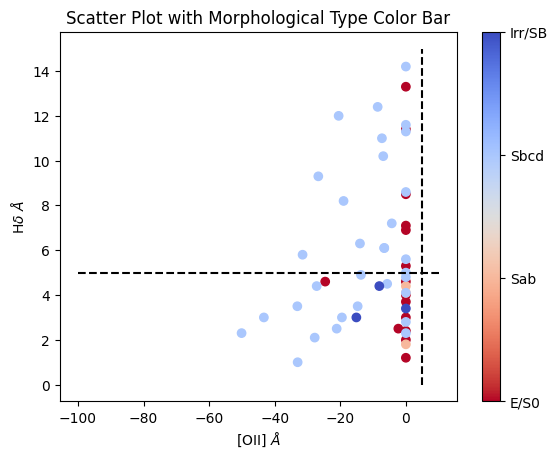

In [104]:
plt.scatter(field2['[OII]'],field2['Hdelta'], c=[categories.tolist().index(mtype) for mtype in field2['MType']], cmap=cmap)
plt.scatter(cluster2['[OII]'], cluster2['Hdelta'], c=[categories.tolist().index(mtype) for mtype in cluster2['MType']], cmap=cmap)
plt.hlines(5, -100, 10, linestyles='dashed', color='black')
plt.vlines(5, 0, 15, linestyles='dashed', color='black')

cbar = plt.colorbar(ticks=np.arange(len(categories)))
cbar.set_ticklabels(categories)
plt.xlabel('[OII] $\AA$')
plt.ylabel('H$\delta$ $\AA$')
plt.title('Scatter Plot with Morphological Type Color Bar')


plt.show()

In [108]:
import seaborn as sns

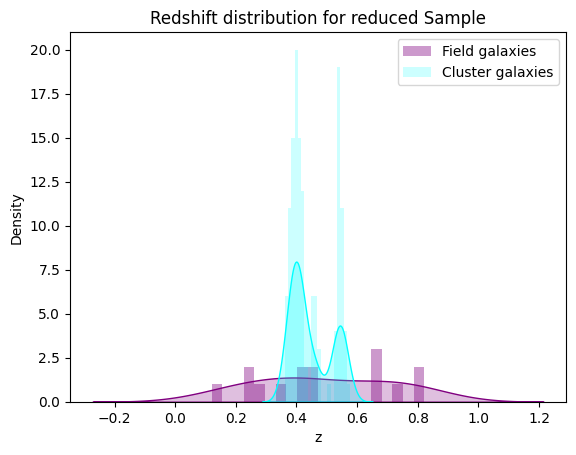

In [115]:
plt.hist(field2['z'], bins=20, color='purple', alpha=0.4, label='Field galaxies')
plt.hist(cluster2['z'], bins=20, color='cyan', alpha=0.2, label='Cluster galaxies')
sns.kdeplot(field2['z'], fill=True, color='purple')
sns.kdeplot(cluster2['z'], fill=True, color='cyan')
plt.title('Redshift distribution for reduced Sample')
plt.legend(loc='best')

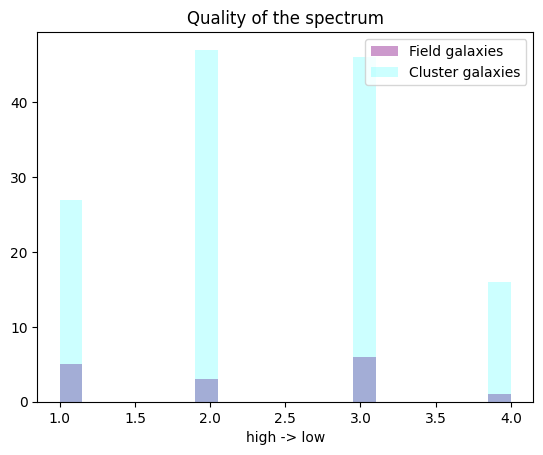

In [124]:
plt.hist(field2['q_z'], bins=20, color='purple', alpha=0.4, label='Field galaxies')
plt.hist(cluster2['q_z'], bins=20, color='cyan', alpha=0.2, label='Cluster galaxies')
plt.title('Quality of the spectrum')
plt.xlabel('high -> low', loc='center')
plt.legend(loc='best')

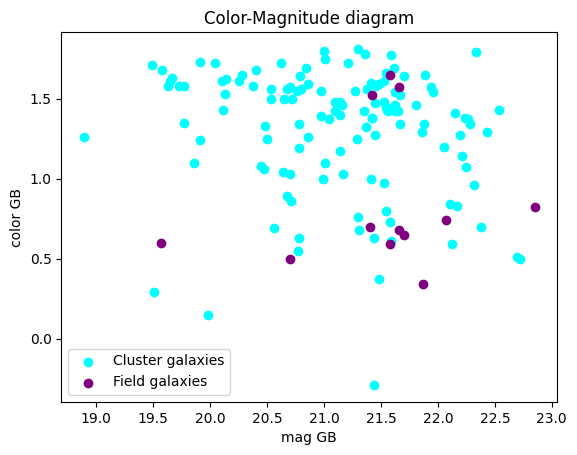

In [132]:
plt.scatter(cluster2['magGB'], cluster2['ColGB'], color='cyan',label='Cluster galaxies')
plt.scatter(field2['magGB'], field2['ColGB'], color='purple',label='Field galaxies')
plt.xlabel('mag GB')
plt.ylabel('color GB')
plt.title('Color-Magnitude diagram')
plt.legend(loc='best')



![](screen.png)

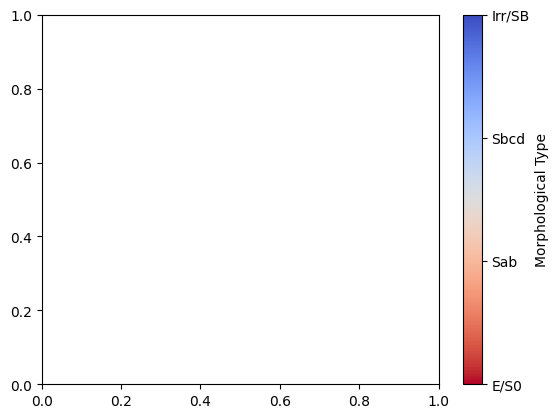

In [92]:
cbar = plt.colorbar(scalar_map, ax=plt.gca())  # Especificar el eje actual como el lugar para la barra de colores
cbar.set_ticks(np.arange(len(categories)))
cbar.set_ticklabels(categories)
cbar.set_label('Morphological Type')